<a href="https://colab.research.google.com/github/Saksham412/Deep-Learning/blob/main/karpathy/makenames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os

def unzip_file(zip_file_path, extract_to_folder):
    try:
        # Ensure the extraction folder exists
        os.makedirs(extract_to_folder, exist_ok=True)

        # Open the zip file
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Extract all contents
            zip_ref.extractall(extract_to_folder)
        print(f"Unzipped '{zip_file_path}' to '{extract_to_folder}' successfully.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
zip_file_path = "/content/makenames.zip"  # Replace with your zip file path
extract_to_folder = "/content/"    # Replace with your desired extraction folder
unzip_file(zip_file_path, extract_to_folder)


Unzipped '/content/makenames.zip' to '/content/' successfully.


In [2]:
import pandas as pd

In [38]:
male_names = pd.read_csv('/content/Dataset-Indian-Names-master/Indian-Female-Names.csv')
# male_names contains data available in Indian-Male-Names.csv which contain only unprocessed male names.

female_names = pd.read_csv('/content/Dataset-Indian-Names-master/Indian-Male-Names.csv')
# female_names contains data available in Indian-Female-Names.csv which contain only unprocessed female names.

namelist = []

for names in female_names['name']:
# processing on names acailable in data.
    first_name = str(names).strip().split(' ')[0]
    if any(char in first_name for char in ['&', '(', ')', ',', '/', '0', '8', '[']):
      continue
    else:
      namelist.append(first_name)

for names in male_names['name']:
# processing on names acailable in data.

    first_name = str(names).strip().split(' ')[0]

    if any(char in first_name for char in ['&', '(', ')', ',', '/', '0', '8', '[']):
      continue
    else:
      namelist.append(first_name)

processed_name_list = []

s = 'abcdefghijklmnopqrstuvwxyz'
# s contains all alphabates a-z.

for i in namelist:
# processing on names acailable in namelist which contains all male and female names .

    i = i.split('@')[0]

    i = i.split('.')[-1]

    i = i.split('-')[-1]

    i = i.strip('`').strip()
    # '&', '(', ')', ',', '/', '0', '8', '[',

    if len(i) > 2:

        for j in i:

            if j in s:
                processed_name_list.append(i)


unique_names = set(processed_name_list)
# unique_names contains unique names and removes repeated names.

processed_name_list = sorted(list(unique_names))

In [30]:
checklist = []
for n in processed_name_list:
  if any(char in n for char in ['&', '(', ')', ',', '/', '0', '8', '[']):
    checklist.append(n)

In [32]:
checklist

['al0k',
 'amit,',
 'kismat/',
 'km0',
 'moh0',
 'pooja/varsha',
 'puspa&',
 'rachna(with',
 'raju,',
 'rina/',
 's/o',
 'sadab(khura)',
 'sandee[',
 'savita,',
 'shakuntla/baby',
 'shi8vprakash',
 'smt,',
 'soniya,',
 'w/o']

In [39]:
# Assuming you have all_unique_names from the previous step

with open('names.txt', 'w') as file:
    for name in processed_name_list:
        file.write(str(name) + '\n')

In [40]:
words = open('names.txt', 'r').read().splitlines()

In [41]:
import random
random.shuffle(words)

In [42]:
len(words)

6467

In [43]:
min(len(word) for word in words)

3

In [44]:
max(len(word) for word in words)

19

In [45]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1
b

{('<S>', 'b'): 398,
 ('b', 'a'): 260,
 ('a', 'n'): 1402,
 ('n', 't'): 154,
 ('t', 'y'): 43,
 ('y', '<E>'): 119,
 ('<S>', 'v'): 182,
 ('v', 'i'): 246,
 ('i', 's'): 285,
 ('s', 'h'): 1233,
 ('h', 'u'): 209,
 ('u', '<E>'): 287,
 ('<S>', 'd'): 296,
 ('d', 'h'): 211,
 ('h', 'a'): 1169,
 ('n', 'e'): 115,
 ('e', 's'): 241,
 ('s', 'w'): 40,
 ('w', 'a'): 232,
 ('a', 'r'): 932,
 ('r', '<E>'): 574,
 ('d', 'a'): 230,
 ('a', 'l'): 549,
 ('l', 'i'): 169,
 ('i', 'p'): 51,
 ('p', '<E>'): 53,
 ('v', 'a'): 136,
 ('a', 'k'): 252,
 ('k', 'e'): 75,
 ('h', '<E>'): 406,
 ('<S>', 's'): 1217,
 ('a', 'm'): 658,
 ('m', 'p'): 41,
 ('p', 'a'): 316,
 ('a', '<E>'): 1552,
 ('<S>', 'j'): 297,
 ('j', 'a'): 343,
 ('a', 'g'): 106,
 ('g', '<E>'): 17,
 ('i', 'k'): 147,
 ('k', 'a'): 400,
 ('r', 'm'): 79,
 ('m', '<E>'): 345,
 ('<S>', 'c'): 140,
 ('c', 'h'): 259,
 ('h', 'i'): 421,
 ('i', 't'): 263,
 ('t', 'r'): 64,
 ('r', 'a'): 1011,
 ('n', 'g'): 74,
 ('g', 'a'): 126,
 ('n', '<E>'): 627,
 ('<S>', 'a'): 586,
 ('a', 'a'): 150,


In [46]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('a', '<E>'), 1552),
 (('a', 'n'), 1402),
 (('s', 'h'), 1233),
 (('<S>', 's'), 1217),
 (('h', 'a'), 1169),
 (('r', 'a'), 1011),
 (('a', 'r'), 932),
 (('i', '<E>'), 919),
 (('n', 'a'), 712),
 (('a', 'm'), 658),
 (('m', 'a'), 629),
 (('n', '<E>'), 627),
 (('s', 'a'), 602),
 (('<S>', 'a'), 586),
 (('r', '<E>'), 574),
 (('a', 'l'), 549),
 (('<S>', 'm'), 549),
 (('<S>', 'r'), 548),
 (('e', 'e'), 502),
 (('i', 'n'), 478),
 (('h', 'i'), 421),
 (('h', '<E>'), 406),
 (('a', 's'), 403),
 (('n', 'd'), 402),
 (('k', 'a'), 400),
 (('<S>', 'b'), 398),
 (('r', 'i'), 395),
 (('l', '<E>'), 394),
 (('t', 'a'), 387),
 (('l', 'a'), 383),
 (('a', 't'), 382),
 (('<S>', 'k'), 378),
 (('<S>', 'p'), 377),
 (('y', 'a'), 371),
 (('<S>', 'n'), 361),
 (('m', '<E>'), 345),
 (('j', 'a'), 343),
 (('n', 'i'), 324),
 (('e', 'n'), 318),
 (('p', 'a'), 316),
 (('d', 'e'), 312),
 (('e', 'r'), 306),
 (('t', '<E>'), 301),
 (('<S>', 'j'), 297),
 (('<S>', 'd'), 296),
 (('a', 'j'), 289),
 (('u', '<E>'), 287),
 (('i', 's'), 28

In [47]:
import torch

In [66]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [67]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [69]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1,ix2] += 1

(-0.5, 26.5, 26.5, -0.5)

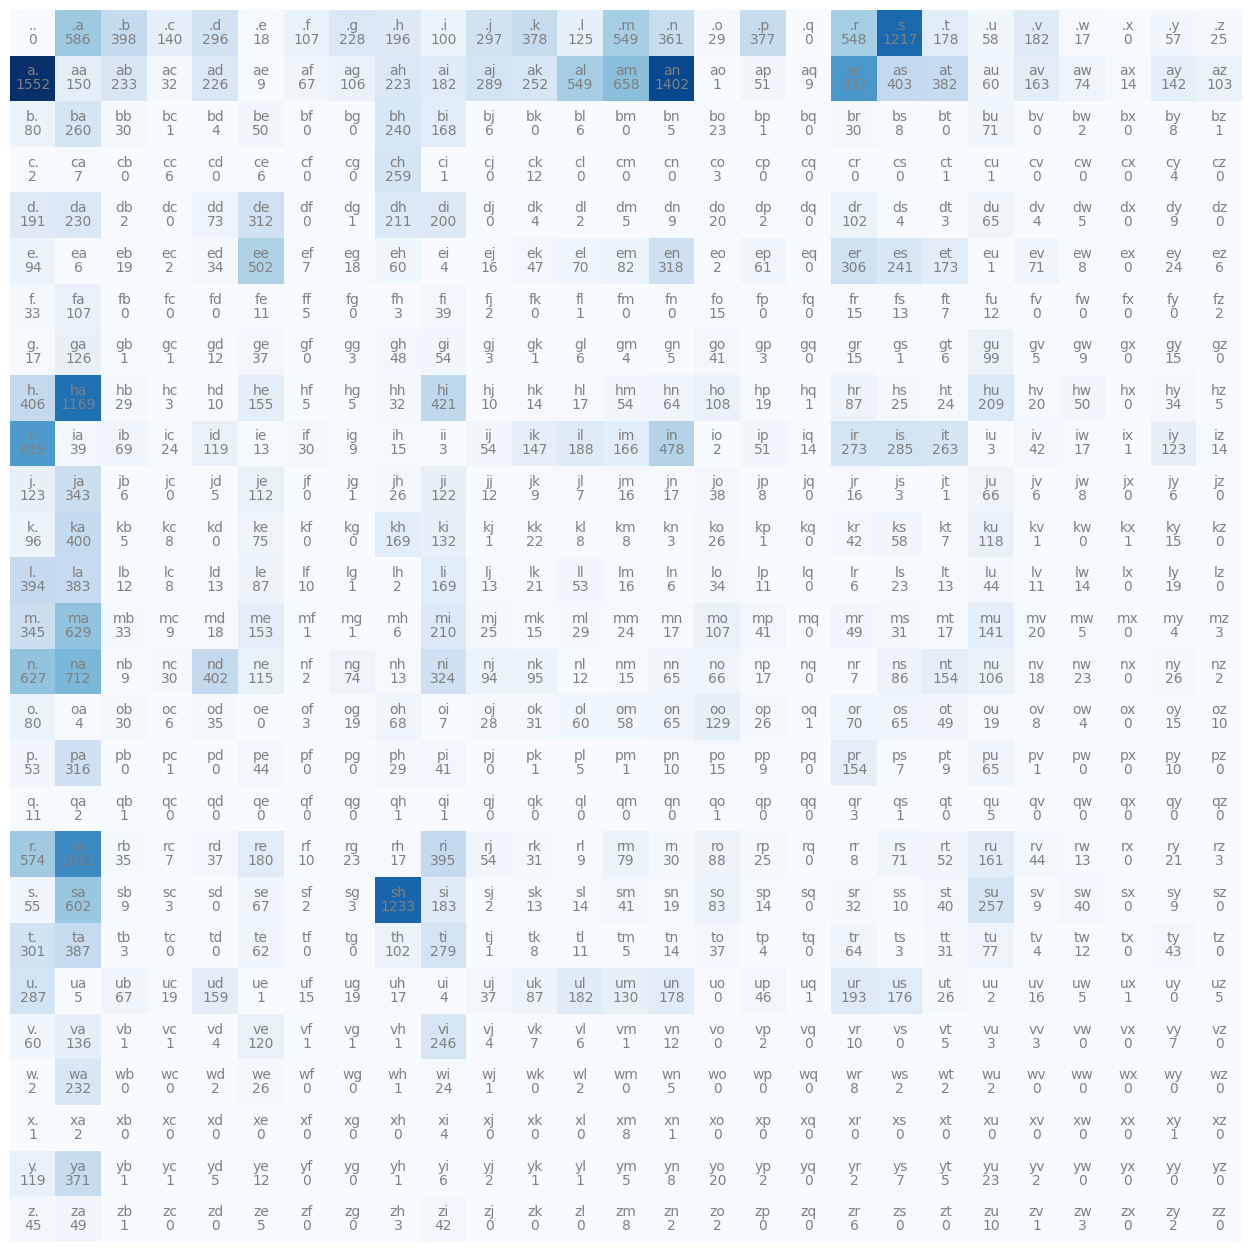

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
    plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')

In [71]:
N[0]

tensor([   0,  586,  398,  140,  296,   18,  107,  228,  196,  100,  297,  378,
         125,  549,  361,   29,  377,    0,  548, 1217,  178,   58,  182,   17,
           0,   57,   25], dtype=torch.int32)

In [89]:
g = torch.Generator().manual_seed(2147483643)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [101]:
P = (N+1).float()

In [102]:
P /= P.sum(1, keepdims=True)

In [103]:
g = torch.Generator().manual_seed(2147483643)

for i in range(20):
  ix = 0
  out = []
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

sharm.
larali.
penj.
burmant.
n.
sh.
sar.
yamohijanamularannj.
shmj.
ba.
vistid.
rshanira.
vi.
s.
yoonjanmunismisomami.
i.
razwee.
virdeel.
bhukida.
j.


In [154]:
log_likelihood = 0.0
n = 0

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-112155.2812)
nll=tensor(112155.2812)
2.3579370975494385


In [115]:
import torch.nn.functional as F

In [110]:
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [111]:
xs

tensor([ 0,  2,  1, 14, 20, 25])

In [112]:
ys

tensor([ 2,  1, 14, 20, 25,  0])

In [120]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [139]:
#forward pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(6), ys].log().mean()

In [122]:
probs.shape

torch.Size([6, 27])

In [140]:
loss.item()

4.337346076965332

In [137]:
#backward pass
W.grad = None
loss.backward()

In [138]:
W.data += -0.1*W.grad

In [143]:
#create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  47565


In [159]:
# gradient descent
for k in range(10):
  #forward pass
  xenc = F.one_hot(xs, num_classes=27).float()
  logits = xenc @ W
  counts = logits.exp()
  probs = counts / counts.sum(1, keepdims=True)
  loss = -probs[torch.arange(num), ys].log().mean()
  print(loss.item())
  #backward pass
  W.grad = None
  loss.backward()
  #update
  W.data += -50*W.grad

2.3613107204437256
2.361283302307129
2.3612563610076904
2.361229658126831
2.361203193664551
2.3611767292022705
2.3611507415771484
2.3611249923706055
2.3610990047454834
2.3610734939575195
